# Driver distraction using Convolutional Neural Networks

### Libraries

In [43]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
import pandas as pd

### Data preprocessing

In [3]:
workingdir = os.path.abspath('')
print(workingdir)
trainingdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/train/')
trainingdataimage = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                       shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest',
                                       validation_split = 0.2)

C:\Users\thami\Documents\GitHub\MachineLearningDriverdistraction


### Training and Validation dataset split

In [4]:
trainingset = trainingdataimage.flow_from_directory(trainingdirectory, target_size = (150,150), 
                                                          class_mode = 'categorical', batch_size = 64, subset = 'training')

validationset = trainingdataimage.flow_from_directory(trainingdirectory, target_size=(150,150), 
                                                            class_mode = 'categorical', batch_size = 64, subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


### Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(trainingset, epochs=50, steps_per_epoch=100, validation_data = validationset, 
                    verbose = 1, validation_steps=50)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

100/100 [==============================] - 144s 1s/step - loss: 0.5122 - accuracy: 0.8284 - val_loss: 0.3766 - val_accuracy: 0.8759
Epoch 44/50
100/100 [==============================] - 145s 1s/step - loss: 0.5070 - accuracy: 0.8284 - val_loss: 0.4306 - val_accuracy: 0.8522
Epoch 45/50
100/100 [==============================] - 144s 1s/step - loss: 0.4773 - accuracy: 0.8372 - val_loss: 0.3356 - val_accuracy: 0.8894
Epoch 46/50
100/100 [==============================] - 145s 1s/step - loss: 0.4663 - accuracy: 0.8409 - val_loss: 0.3696 - val_accuracy: 0.8856
Epoch 47/50
100/100 [==============================] - 144s 1s/step - loss: 0.4761 - accuracy: 0.8381 - val_loss: 0.3904 - val_accuracy: 0.8616
Epoch 48/50
100/100 [==============================] - 145s 1s/step - loss: 0.4388 - accuracy: 0.8511 - val_loss: 0.3770 - val_accuracy: 0.8781
Epoch 49/50
100/100 [==============================] - 144s 1s/step - loss: 0.4683 - accuracy: 0.8505 - val_loss: 0.3417 - val_accuracy: 0.8875
Epoc

### Plot to show training accuracy vs validation accuracy

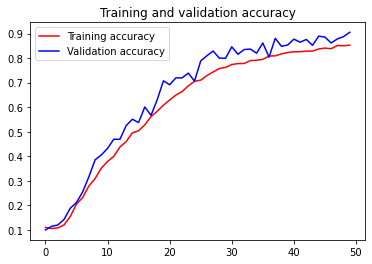

<Figure size 432x288 with 0 Axes>

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Test data prediction

In [29]:
testparentdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/')

In [30]:
testdataimage = ImageDataGenerator(rescale = 1./255)
testdata = testdataimage.flow_from_directory(testparentdirectory, classes=['test'], target_size = (150,150))

Found 79726 images belonging to 1 classes.


In [62]:
testouput = model.predict(testdata, verbose = 1)

2492/2492 [==============================] - 546s 219ms/step


In [63]:
testouput.shape

(79726, 10)

In [64]:
testouput[1]

array([0.2369506 , 0.16271244, 0.01147346, 0.08651805, 0.1851528 ,
       0.01063938, 0.06195443, 0.0074054 , 0.0218142 , 0.21537918],
      dtype=float32)

In [44]:
specimencsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/sample_submission.csv'))

In [67]:
result = {'img':list(specimencsv.values[:,0]),}

In [68]:
for value in range(0,10):
    result['c' + str(value)] = list(testouput[:,value])

In [69]:
testouput = pd.DataFrame(result)

In [70]:
testouput.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,6.779991e-04,9.833091e-01,1.686877e-05,1.855881e-05,8.263311e-06,2.018039e-05,1.017706e-02,5.597639e-06,4.904526e-03,8.619146e-04
1,img_10.jpg,2.369506e-01,1.627124e-01,1.147346e-02,8.651805e-02,1.851528e-01,1.063938e-02,6.195443e-02,7.405402e-03,2.181420e-02,2.153792e-01
2,img_100.jpg,4.010080e-11,1.076306e-17,9.433393e-21,1.000000e+00,1.537855e-13,6.842889e-15,6.411311e-13,2.351963e-17,8.150876e-15,1.062815e-10
3,img_1000.jpg,3.254809e-04,1.411007e-06,1.263017e-14,9.995173e-01,1.672356e-07,1.914289e-07,5.424031e-08,3.458463e-10,1.381763e-07,1.552293e-04
4,img_100000.jpg,7.610538e-06,2.347705e-11,7.363772e-13,1.224684e-08,7.238879e-11,9.851471e-01,6.453410e-09,2.502527e-09,2.423564e-06,1.484291e-02
